# Model Buildings And Evaluation

## Importing Libraries

In [13]:
import os
import re
import nltk
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['figure.dpi'] = 350
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

## Loading Dataset

In [14]:
csv_path = os.path.join(os.path.dirname(os.getcwd()),'Datasets', 'cleaned_spam_data.csv')
spam_dataset = pd.read_csv(csv_path)

spam_dataset

,message,label
0,go jurong point crazy available bugis n great ...,ham
1,ok lar joking wif u oni,ham
2,free entry wkly comp win fa cup final tkts st ...,spam
3,u dun say early hor u c already say,ham
4,nah think go usf life around though,ham
...,...,...
5164,nd time tried contact u u pound prize claim ea...,spam
5165,b going esplanade fr home,ham
5166,pity mood suggestion,ham
5167,guy bitching acted like interested buying some...,ham


### Checking For Null Values

In [15]:
for i in spam_dataset.columns:
    print('\n Column Name :' + str(i))
    print(" Total no of null values : " + str(spam_dataset[i].isna().sum()))


 Column Name :message
 Total no of null values : 7

 Column Name :label
 Total no of null values : 0


In [16]:
spam_dataset.dropna(inplace=True)
spam_dataset.reset_index(drop=True, inplace=True)

In [17]:
for i in spam_dataset.columns:
    print('\n Column Name :' + str(i))
    print(" Total no of null values : " + str(spam_dataset[i].isna().sum()))


 Column Name :message
 Total no of null values : 0

 Column Name :label
 Total no of null values : 0


## Performing Train Test Split

In [18]:
x = spam_dataset.loc[:,'message']

x.shape

(5162,)

#### Encoding Categorical Data

In [19]:
le = LabelEncoder()
y = le.fit_transform(spam_dataset.loc[:,'label'])

y.shape

(5162,)

### Tokenizeing The Data

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=20, padding='post')

x

array([[   5, 3301,  268, ...,    0,    0,    0],
       [   8,  215, 1157, ...,    0,    0,    0],
       [ 405,  828,  764, ...,  236,   30,  332],
       ...,
       [7121, 1480, 3298, ...,    0,    0,    0],
       [ 128, 7122, 3268, ...,    0,    0,    0],
       [2040,  370,  165, ...,    0,    0,    0]])

In [21]:
len(x)


5162

## Model Building

### Splitting the Data with 70% Train set and 30% Test set

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=10)

### Creating Default Model with 30% Test size

In [23]:
length_pad = 20
no_of_words = 7982

model = Sequential()
model.add(Embedding(input_dim=no_of_words+1, output_dim=128, input_shape=(length_pad,)))
model.add(LSTM(400, dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 400)            │       846,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,893,953 (7.22 MB)

 Trainable params: 1,893,953 (7.22 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(xtrain, ytrain, epochs=100, batch_size=64, validation_data=(xtest, ytest))

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.8547 - loss: 0.3456 - val_accuracy: 0.9748 - val_loss: 0.0823
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9855 - loss: 0.0544 - val_accuracy: 0.9742 - val_loss: 0.1027
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9951 - loss: 0.0268 - val_accuracy: 0.9761 - val_loss: 0.1356
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9973 - loss: 0.0153 - val_accuracy: 0.9658 - val_loss: 0.1506
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9985 - loss: 0.0043 - val_accuracy: 0.9755 - val_loss: 0.0766
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.9966 - loss: 0.0125 - val_accuracy: 0.9658 - val_loss: 0.1447
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.9963 - loss: 0.0184 - val_accuracy: 0.9697 - val_loss: 0.1640
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9987 - loss: 0.0087 - val_accuracy: 0

### Splitting The Data with 80% Train set and 20% Test set

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=10)

### Creating Default Model with 20% Test size

In [26]:
length_pad = 20
no_of_words = 7982

In [27]:
def_model = Sequential()
def_model.add(Embedding(input_dim=no_of_words+1, output_dim=128, input_shape=(length_pad,)))
def_model.add(LSTM(400, dropout=0.2,recurrent_dropout=0.2))
def_model.add(Dense(64, activation='relu'))
def_model.add(Dense(1, activation='sigmoid'))

def_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
def_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 400)            │       846,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,893,953 (7.22 MB)

 Trainable params: 1,893,953 (7.22 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
def_history = def_model.fit(xtrain, ytrain, epochs=100, batch_size=64, validation_data=(xtest, ytest))

Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.8922 - loss: 0.3025 - val_accuracy: 0.9806 - val_loss: 0.0622
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9896 - loss: 0.0401 - val_accuracy: 0.9777 - val_loss: 0.0735
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9946 - loss: 0.0224 - val_accuracy: 0.9806 - val_loss: 0.0603
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.9986 - loss: 0.0111 - val_accuracy: 0.9758 - val_loss: 0.1385
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.9971 - loss: 0.0218 - val_accuracy: 0.9729 - val_loss: 0.0888
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.9988 - loss: 0.0084 - val_accuracy: 0.9719 - val_loss: 0.1644
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9966 - loss: 0.0164 - val_accuracy: 0.9719 - val_loss: 0.1923
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9989 - loss: 0.0068 - val_accuracy: 0.

### Creating Model With Early Stopping

In [29]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=20)

In [30]:
es_model = Sequential()
es_model.add(Embedding(input_dim=no_of_words+1, output_dim=128, input_shape=(length_pad,)))
es_model.add(LSTM(400, dropout=0.2,recurrent_dropout=0.2))
es_model.add(Dense(64, activation='relu'))
es_model.add(Dense(1, activation='sigmoid'))

es_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 400)            │       846,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,893,953 (7.22 MB)

 Trainable params: 1,893,953 (7.22 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
es_history = es_model.fit(xtrain, ytrain, epochs=100, batch_size=64, validation_data=(xtest, ytest), callbacks=[early])

Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 155ms/step - accuracy: 0.8918 - loss: 0.3228 - val_accuracy: 0.9748 - val_loss: 0.0754
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9871 - loss: 0.0525 - val_accuracy: 0.9777 - val_loss: 0.0780
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.9949 - loss: 0.0268 - val_accuracy: 0.9768 - val_loss: 0.1108
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.9981 - loss: 0.0106 - val_accuracy: 0.9806 - val_loss: 0.0817
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9979 - loss: 0.0114 - val_accuracy: 0.9748 - val_loss: 0.1358
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9985 - loss: 0.0064 - val_accuracy: 0.9748 - val_loss: 0.1536
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.9981 - loss: 0.0066 - val_accuracy: 0.9719 - val_loss: 0.2121
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.9773 - loss: 0.0611 - val_acc

### Creating Model With Drop Out Layer

In [32]:
dol_model = Sequential()
dol_model.add(Embedding(input_dim=no_of_words+1, output_dim=128, input_shape=(length_pad,)))
dol_model.add(LSTM(400, dropout=0.2,recurrent_dropout=0.2))
dol_model.add(Dropout(rate=0.5))
dol_model.add(Dense(64, activation='relu'))
dol_model.add(Dropout(rate=0.5))
dol_model.add(Dense(1, activation='sigmoid'))

dol_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
dol_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 400)            │       846,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,893,953 (7.22 MB)

 Trainable params: 1,893,953 (7.22 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
dol_history = dol_model.fit(xtrain, ytrain, epochs=100, batch_size=64, validation_data=(xtest, ytest))

Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.8851 - loss: 0.3133 - val_accuracy: 0.9797 - val_loss: 0.0602
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9907 - loss: 0.0483 - val_accuracy: 0.9816 - val_loss: 0.0844
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9967 - loss: 0.0195 - val_accuracy: 0.9787 - val_loss: 0.0687
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9924 - loss: 0.0402 - val_accuracy: 0.9748 - val_loss: 0.1316
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.9979 - loss: 0.0100 - val_accuracy: 0.9710 - val_loss: 0.2004
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.9975 - loss: 0.0116 - val_accuracy: 0.9797 - val_loss: 0.1363
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9980 - loss: 0.0081 - val_accuracy: 0.9748 - val_loss: 0.1648
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.9990 - loss: 0.0081 - val_accuracy: 0.

### Creating Model With Drop Out Layer & Early Stopping

In [34]:
es_dol_model = Sequential()
es_dol_model.add(Embedding(input_dim=no_of_words+1, output_dim=128, input_shape=(length_pad,)))
es_dol_model.add(LSTM(400, dropout=0.2,recurrent_dropout=0.2))
es_dol_model.add(Dropout(rate=0.5))
es_dol_model.add(Dense(64, activation='relu'))
es_dol_model.add(Dropout(rate=0.5))
es_dol_model.add(Dense(1, activation='sigmoid'))

es_dol_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_dol_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 400)            │       846,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,893,953 (7.22 MB)

 Trainable params: 1,893,953 (7.22 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
es_dol_history = es_dol_model.fit(xtrain, ytrain, epochs=100, batch_size=64, validation_data=(xtest, ytest), callbacks=[early])

Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.8833 - loss: 0.3151 - val_accuracy: 0.9797 - val_loss: 0.0631
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9899 - loss: 0.0365 - val_accuracy: 0.9748 - val_loss: 0.1061
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.9969 - loss: 0.0158 - val_accuracy: 0.9797 - val_loss: 0.0754
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9984 - loss: 0.0145 - val_accuracy: 0.9710 - val_loss: 0.1428
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.9933 - loss: 0.0326 - val_accuracy: 0.9710 - val_loss: 0.1348
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9967 - loss: 0.0195 - val_accuracy: 0.9787 - val_loss: 0.0815
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9980 - loss: 0.0103 - val_accuracy: 0.9787 - val_loss: 0.1889
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.9985 - loss: 0.0161 - val_accuracy: 0.

## Model Evaluation

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Evaluating  Model(30% Test size) :-
Model Accuracy   :  0.97
Model precision  :  0.83
Model recall     :  0.9
Model f1_score   :  0.87
Printing Confusion Matrix :
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       908
           1       0.83      0.90      0.87       125

    accuracy                           0.97      1033
   macro avg       0.91      0.94      0.92      1033
weighted avg       0.97      0.97      0.97      1033
 

Printing Confusion Matrix :
[[885  23]
 [ 12 113]]


<Figure size 5600x3150 with 0 Axes>

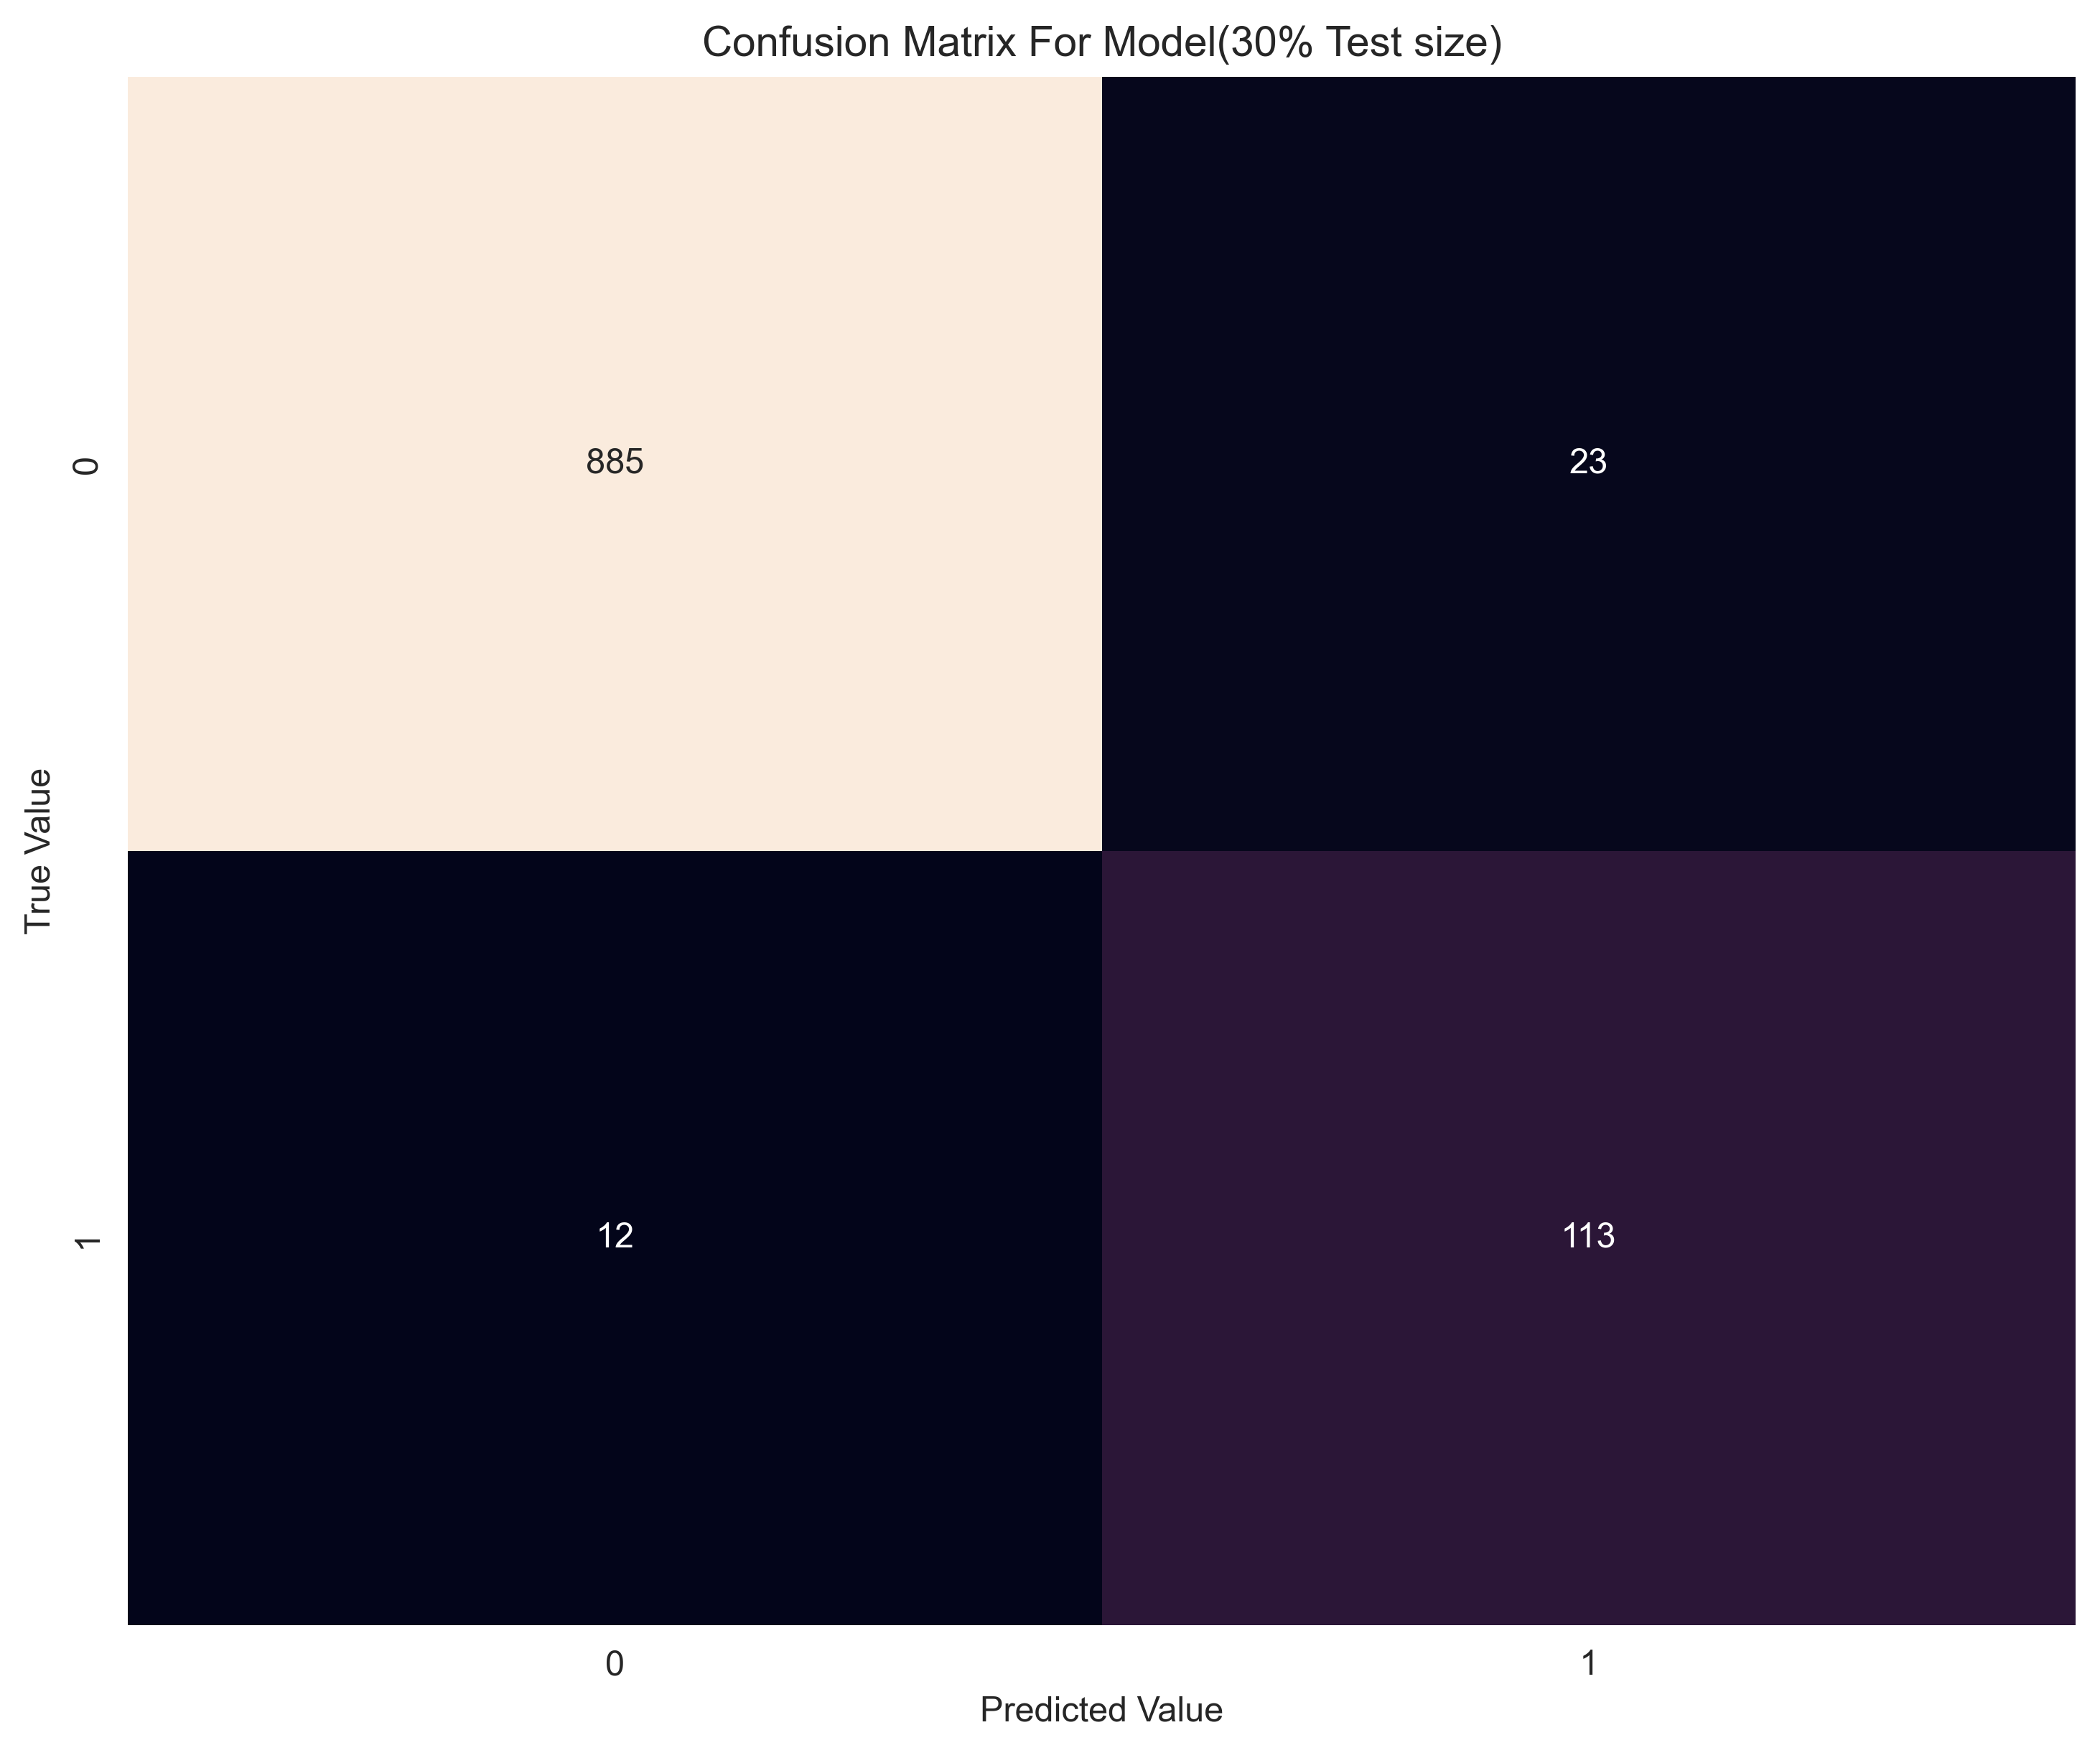

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Evaluating  Default Model(20% Test size) :-
Model Accuracy   :  0.98
Model precision  :  0.92
Model recall     :  0.91
Model f1_score   :  0.92
Printing Confusion Matrix :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       908
           1       0.92      0.91      0.92       125

    accuracy                           0.98      1033
   macro avg       0.95      0.95      0.95      1033
weighted avg       0.98      0.98      0.98      1033
 

Printing Confusion Matrix :
[[898  10]
 [ 11 114]]


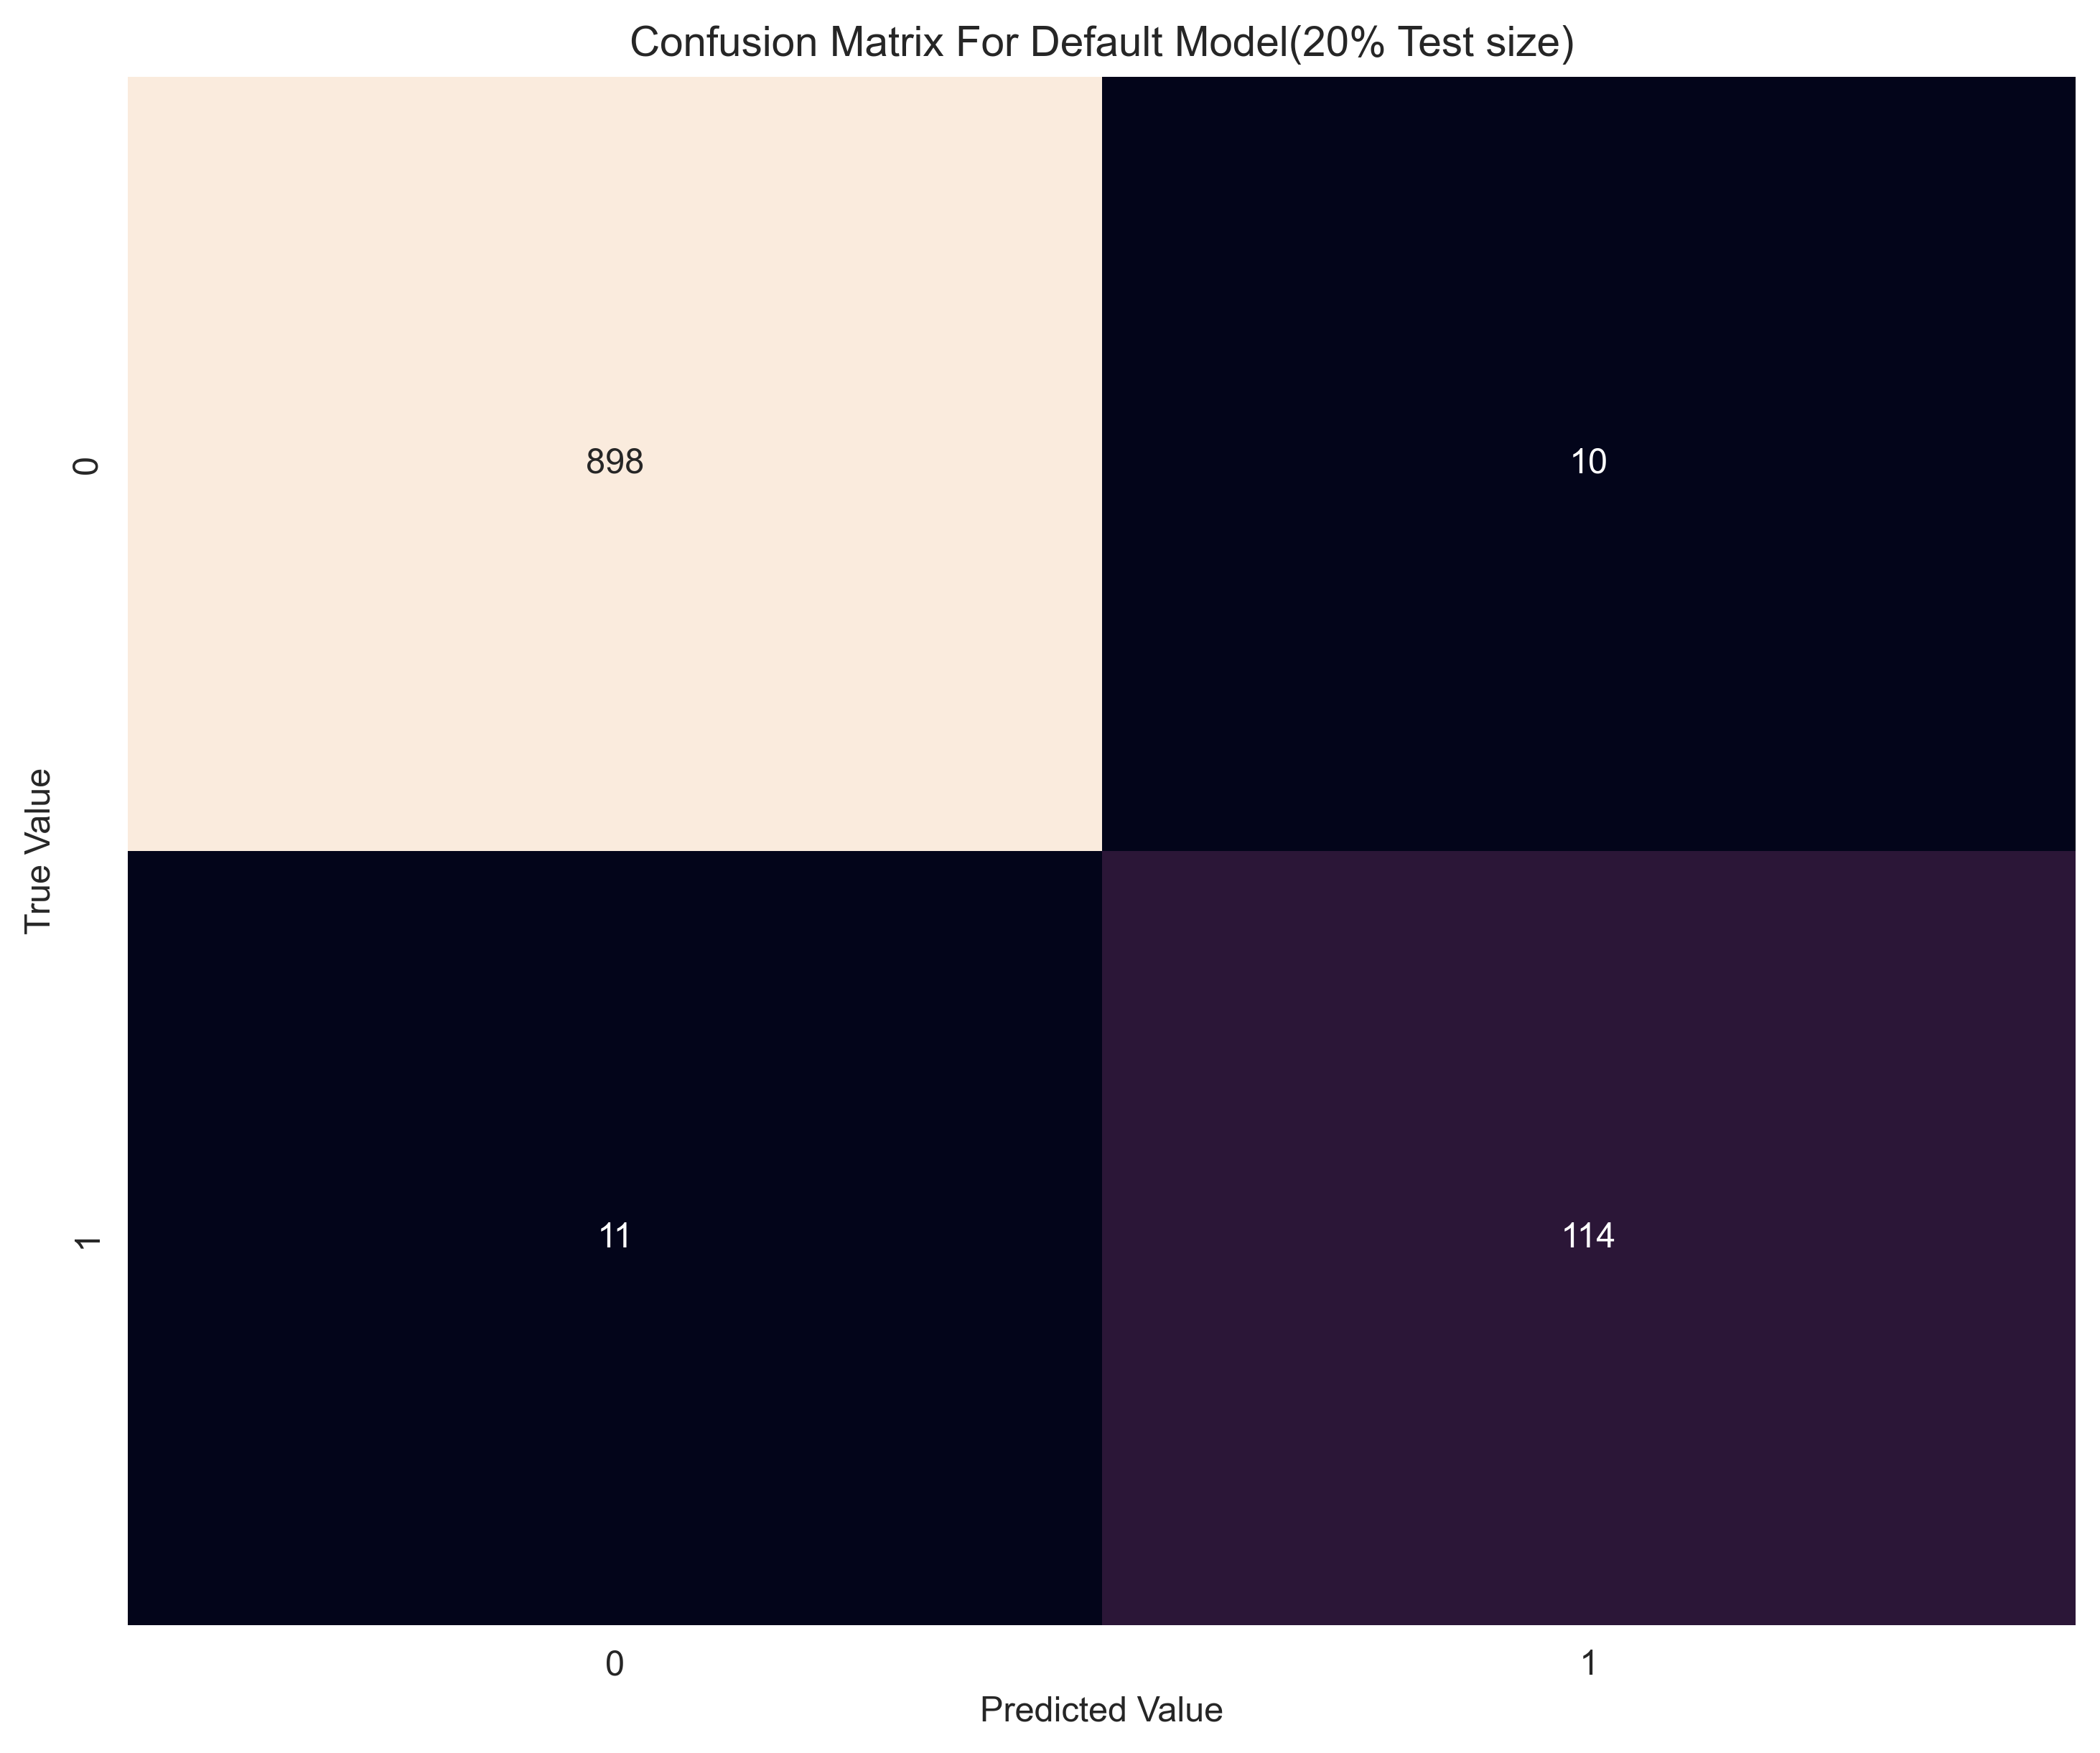

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Evaluating  ES Model :-
Model Accuracy   :  0.98
Model precision  :  0.93
Model recall     :  0.93
Model f1_score   :  0.93
Printing Confusion Matrix :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       908
           1       0.93      0.93      0.93       125

    accuracy                           0.98      1033
   macro avg       0.96      0.96      0.96      1033
weighted avg       0.98      0.98      0.98      1033
 

Printing Confusion Matrix :
[[899   9]
 [  9 116]]


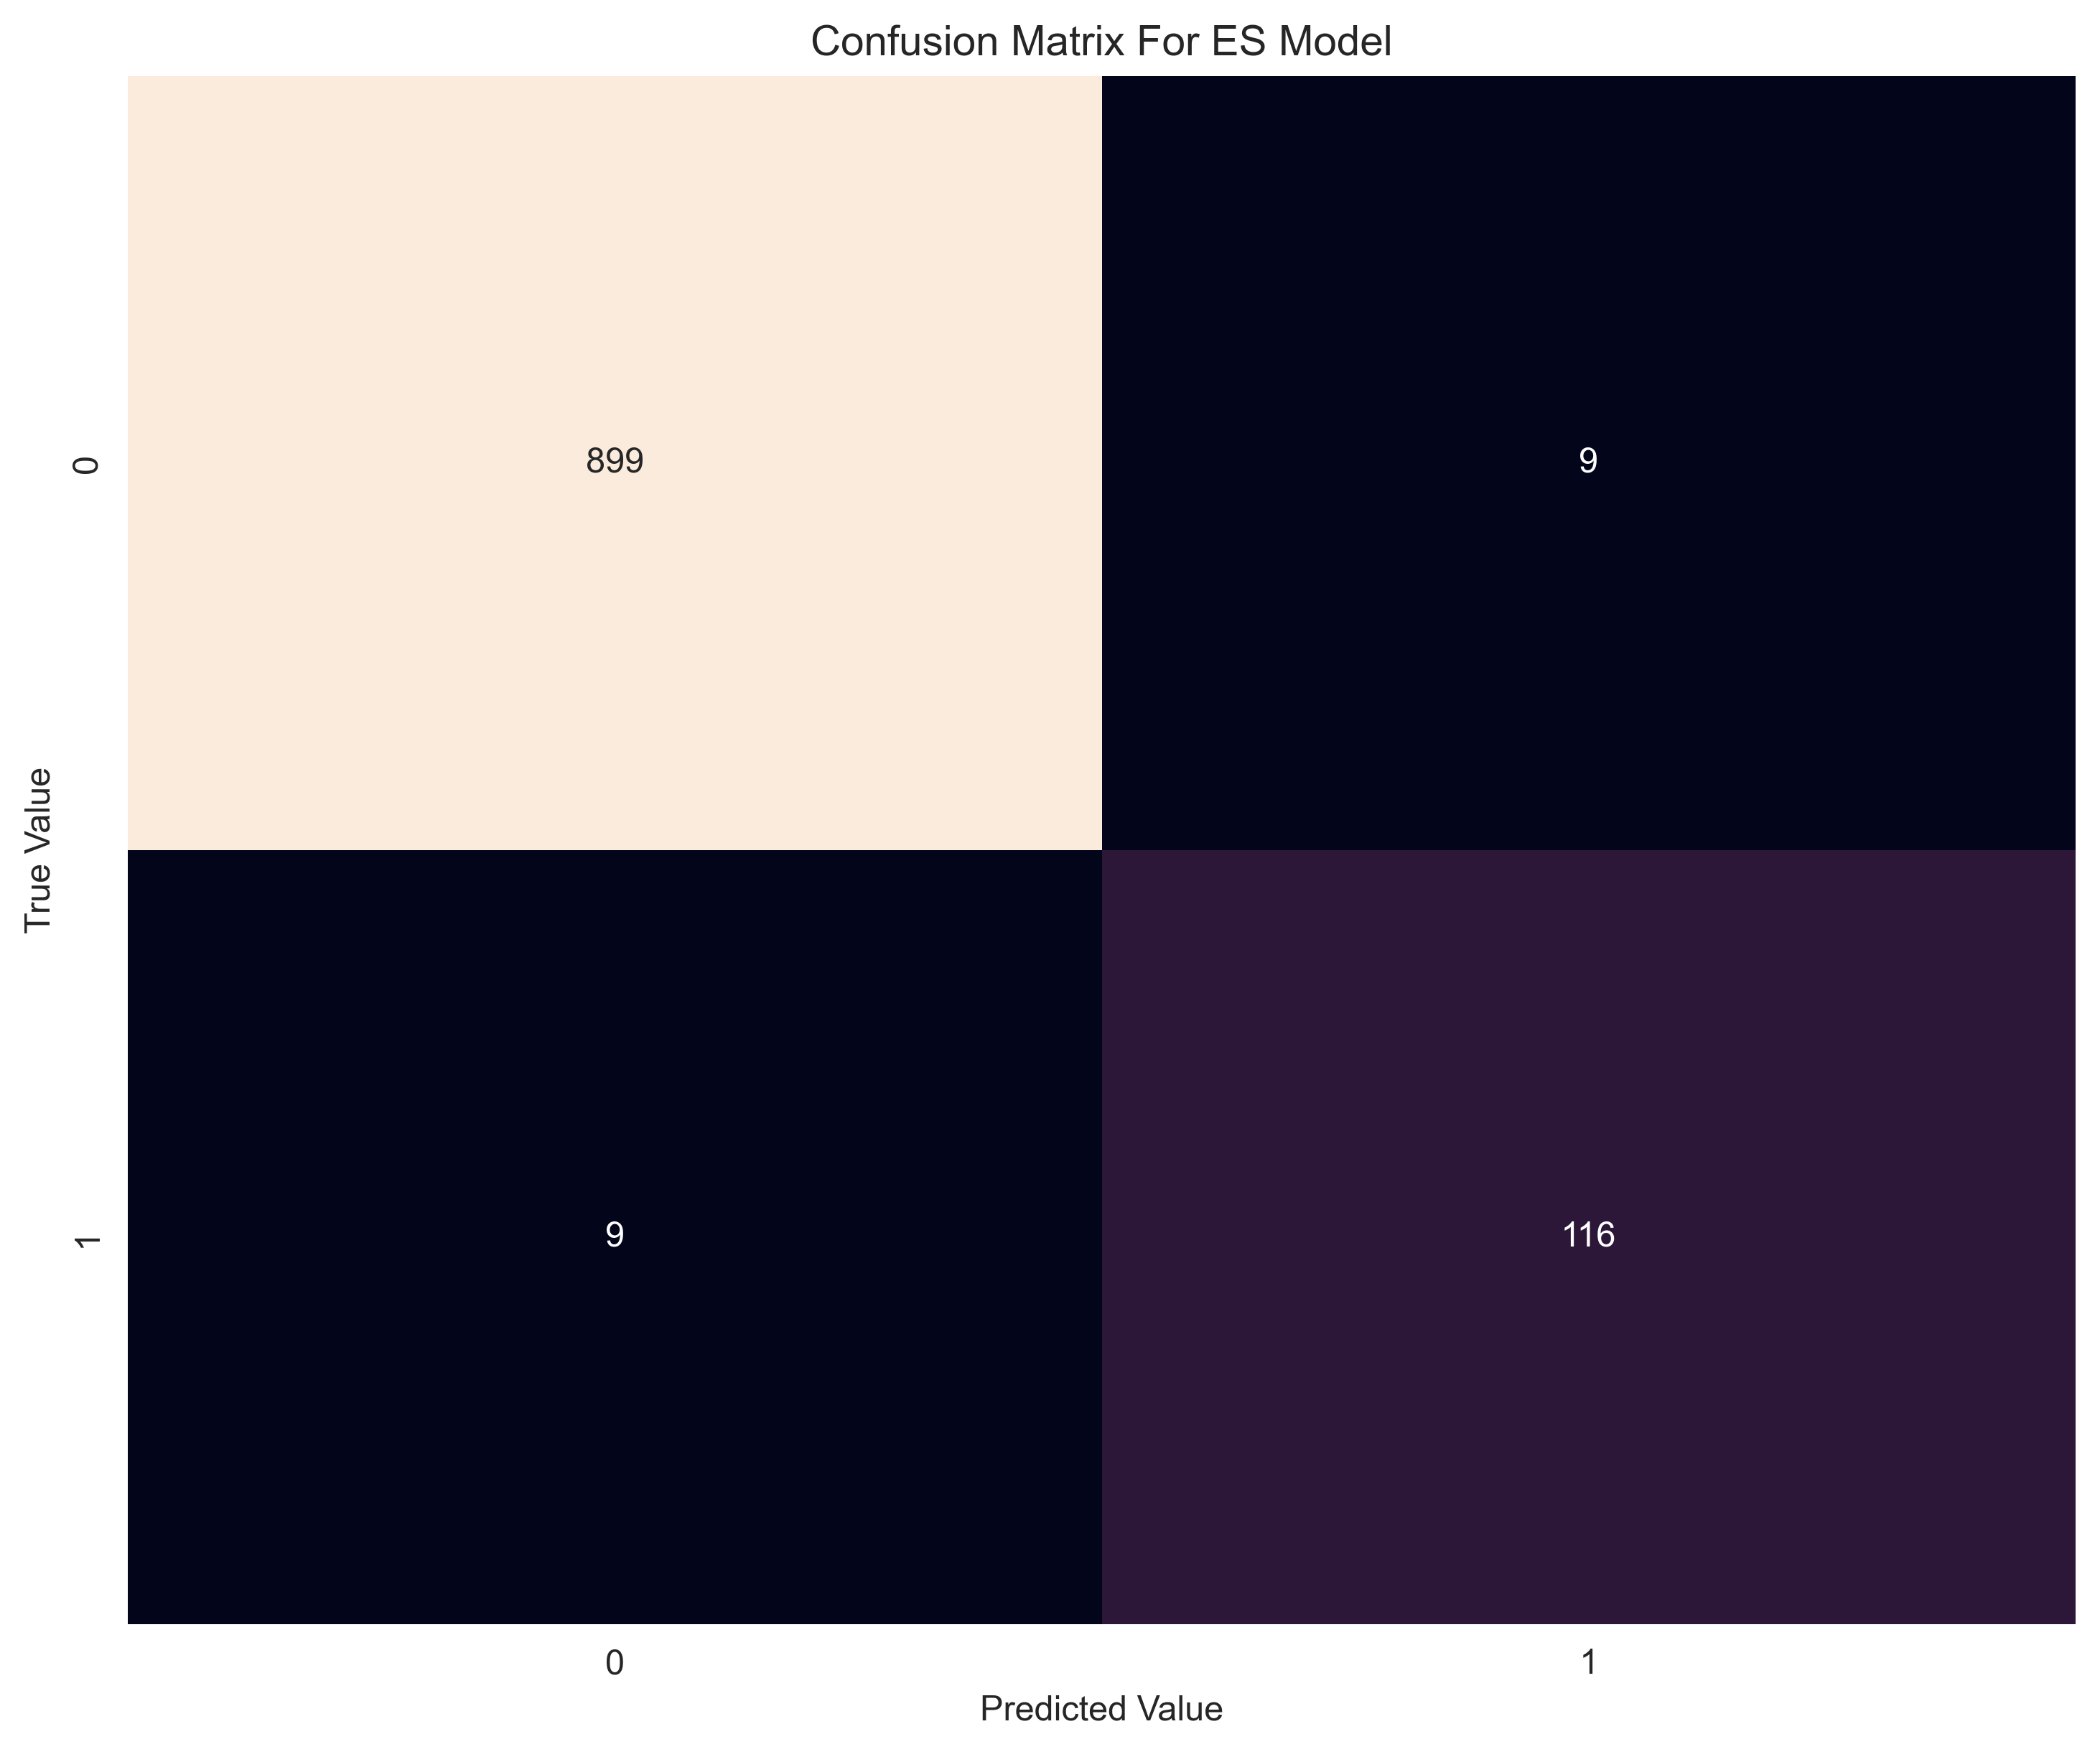

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Evaluating  DOL Model :-
Model Accuracy   :  0.97
Model precision  :  0.82
Model recall     :  0.94
Model f1_score   :  0.87
Printing Confusion Matrix :
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       908
           1       0.82      0.94      0.87       125

    accuracy                           0.97      1033
   macro avg       0.90      0.95      0.93      1033
weighted avg       0.97      0.97      0.97      1033
 

Printing Confusion Matrix :
[[882  26]
 [  8 117]]


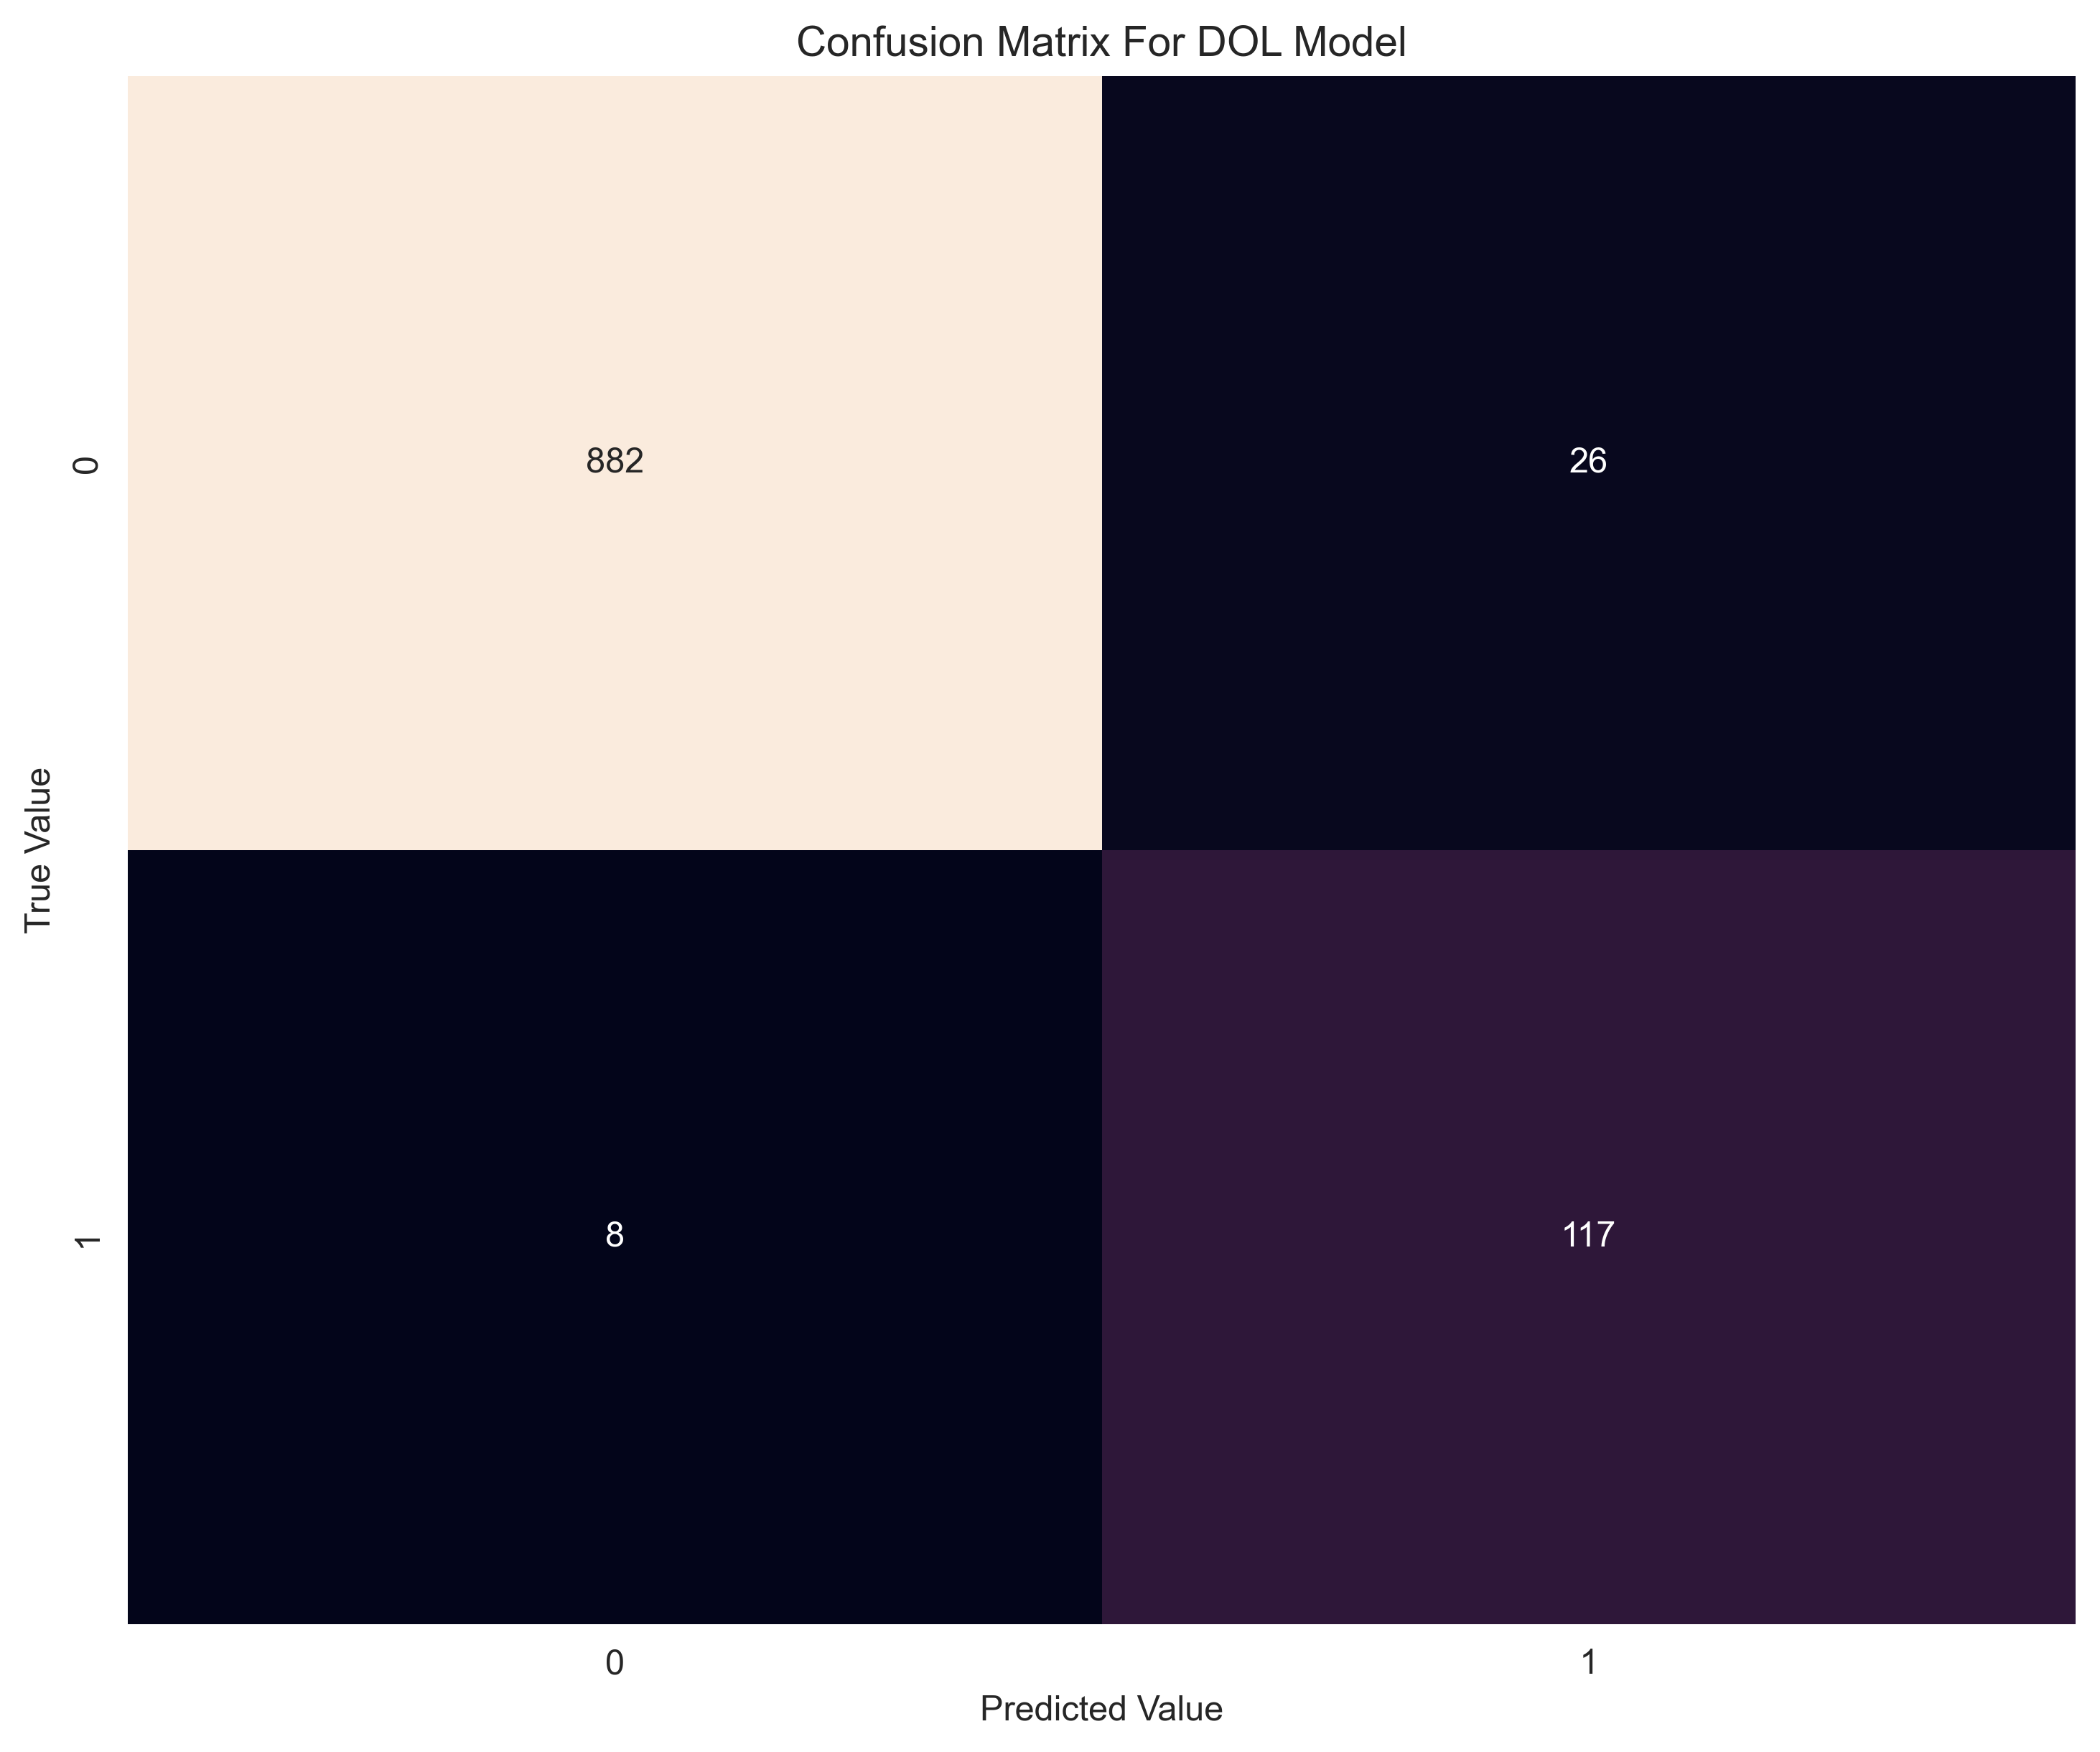

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Evaluating  ES & DOL Model :-
Model Accuracy   :  0.98
Model precision  :  0.94
Model recall     :  0.86
Model f1_score   :  0.9
Printing Confusion Matrix :
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       908
           1       0.94      0.86      0.90       125

    accuracy                           0.98      1033
   macro avg       0.96      0.93      0.94      1033
weighted avg       0.98      0.98      0.98      1033
 

Printing Confusion Matrix :
[[901   7]
 [ 17 108]]


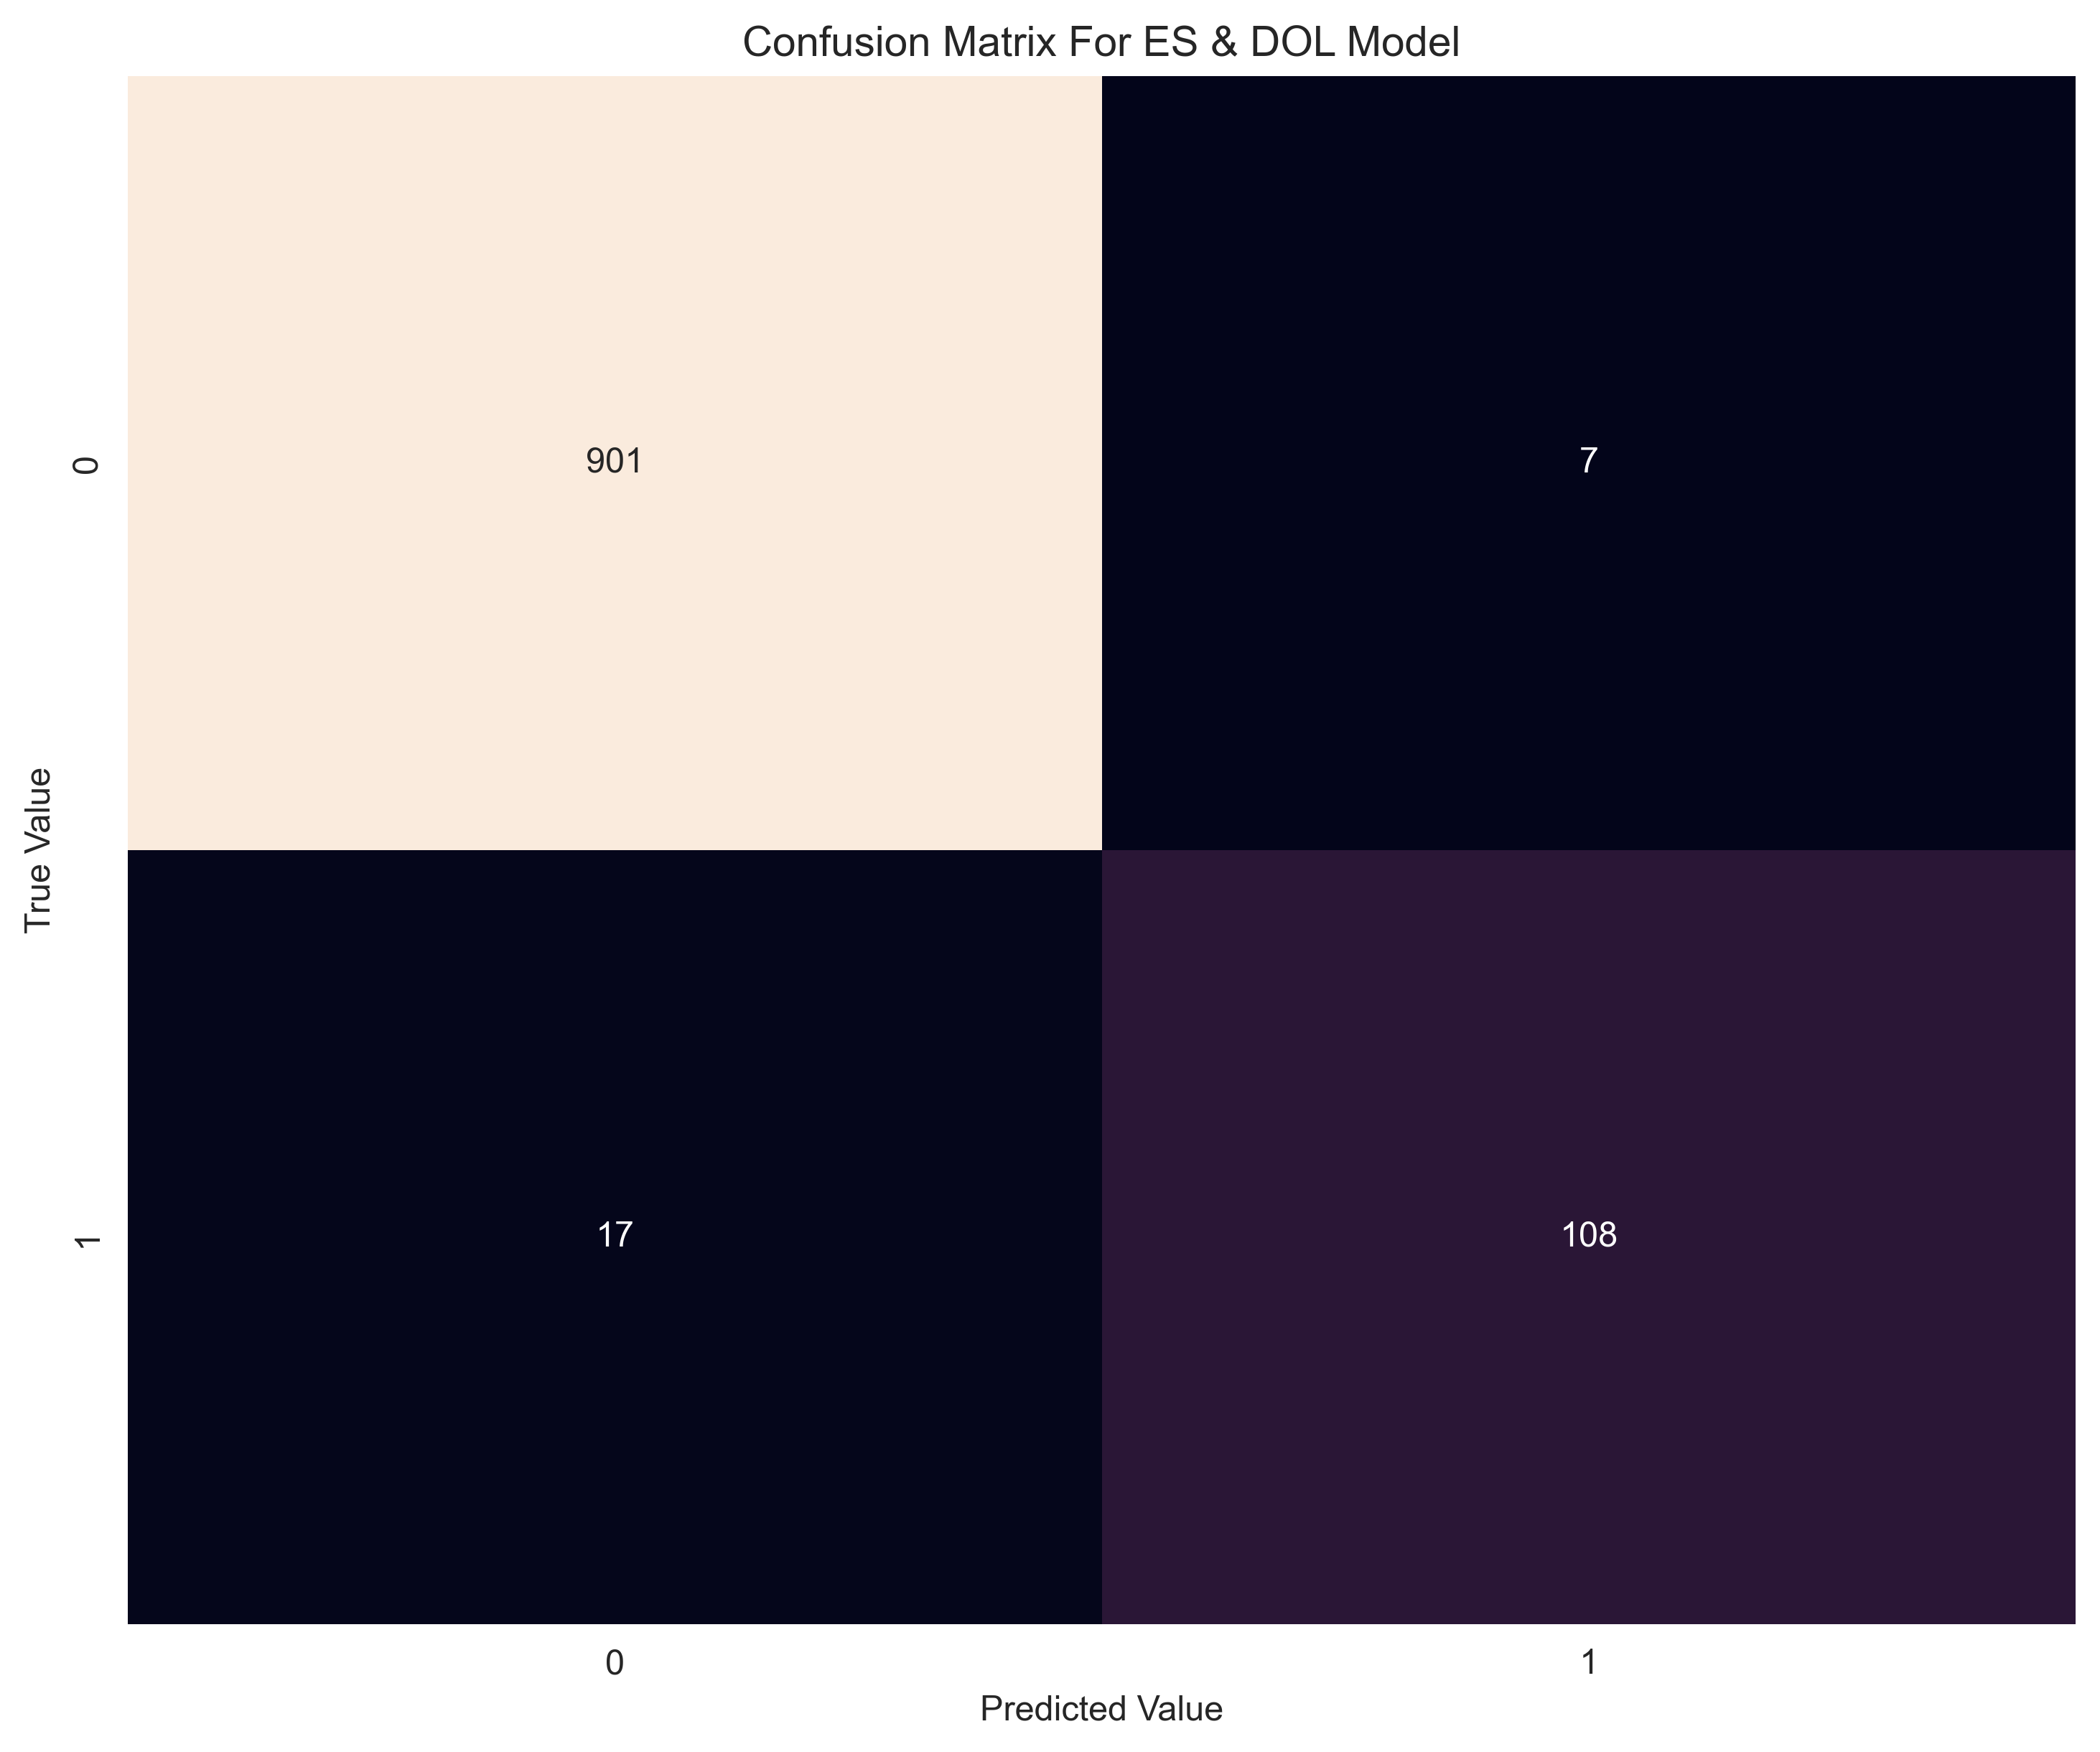

In [36]:
model = [model, def_model, es_model, dol_model, es_dol_model]
model_name = ['Model(30% Test size)', 'Default Model(20% Test size)', 'ES Model', 'DOL Model', 'ES & DOL Model']

for i in range(len(model)):

    yp = model[i].predict(xtest)
    ypred = []

    for j in yp:
        if j > 0.5:
            ypred.append(1)
        else:
            ypred.append(0)

    print("Evaluating ", model_name[i], ":-")
    print("Model Accuracy   : ", round(accuracy_score(ytest, ypred), 2))
    print("Model precision  : ", round(precision_score(ytest, ypred), 2))
    print("Model recall     : ", round(recall_score(ytest, ypred), 2))
    print("Model f1_score   : ", round(f1_score(ytest, ypred), 2))
    print('Printing Confusion Matrix :')
    print(classification_report(ytest, ypred), '\n')
    print('Printing Confusion Matrix :')
    print(confusion_matrix(ytest, ypred))

    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_matrix(ytest, ypred), annot= True, fmt='d', cbar=False)
    plt.title('Confusion Matrix For '+ model_name[i])
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.show()

### Ploting Loss VS Val-Loss For All Model

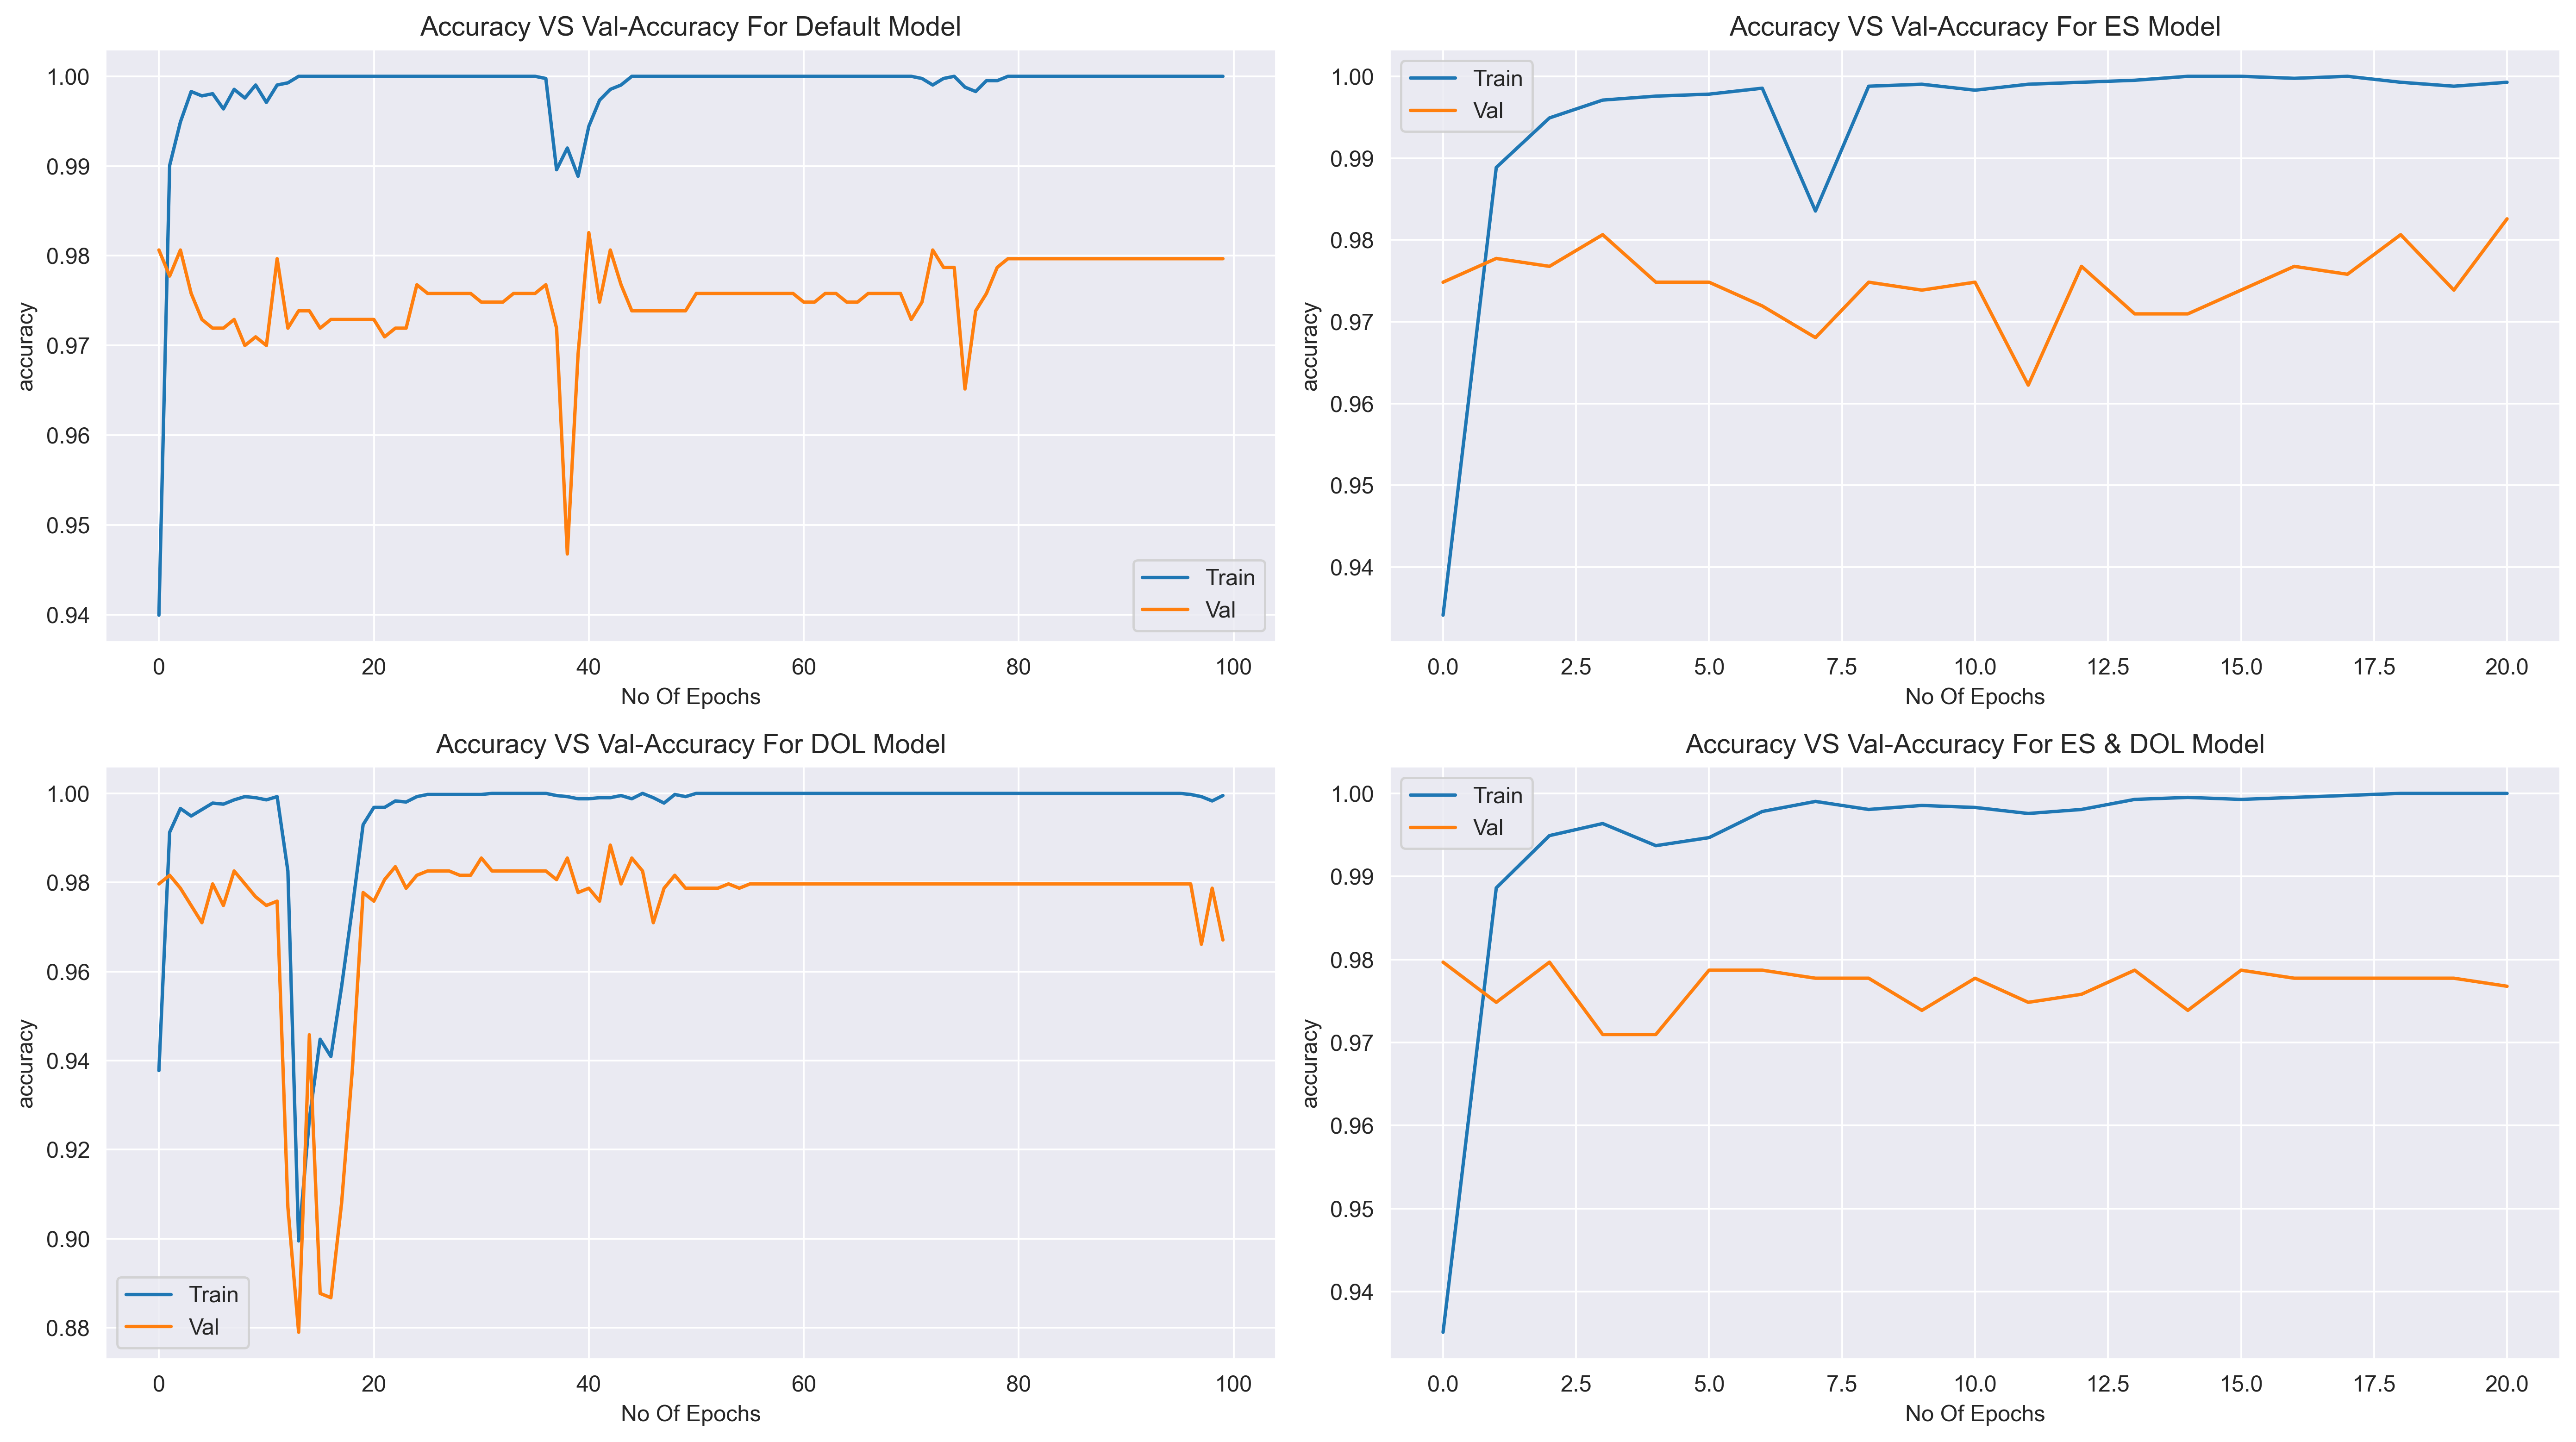

In [37]:
fig, ax = plt.subplots(2,2)

ax[0][0].set_title('Accuracy VS Val-Accuracy For Default Model')
ax[0][0].set_xlabel('No Of Epochs')
ax[0][0].set_ylabel('accuracy')
sns.lineplot(def_history.history['accuracy'], label='Train', ax=ax[0][0])
sns.lineplot(def_history.history['val_accuracy'], label='Val', ax=ax[0][0])

ax[0][1].set_title('Accuracy VS Val-Accuracy For ES Model')
ax[0][1].set_xlabel('No Of Epochs')
ax[0][1].set_ylabel('accuracy')
sns.lineplot(es_history.history['accuracy'], label='Train', ax=ax[0][1])
sns.lineplot(es_history.history['val_accuracy'], label='Val', ax=ax[0][1])

ax[1][0].set_title('Accuracy VS Val-Accuracy For DOL Model')
ax[1][0].set_xlabel('No Of Epochs')
ax[1][0].set_ylabel('accuracy')
sns.lineplot(dol_history.history['accuracy'], label='Train', ax=ax[1][0])
sns.lineplot(dol_history.history['val_accuracy'], label='Val', ax=ax[1][0])

ax[1][1].set_title('Accuracy VS Val-Accuracy For ES & DOL Model')
ax[1][1].set_xlabel('No Of Epochs')
ax[1][1].set_ylabel('accuracy')
sns.lineplot(es_dol_history.history['accuracy'], label='Train', ax=ax[1][1])
sns.lineplot(es_dol_history.history['val_accuracy'], label='Val', ax=ax[1][1])


plt.tight_layout()
plt.show()

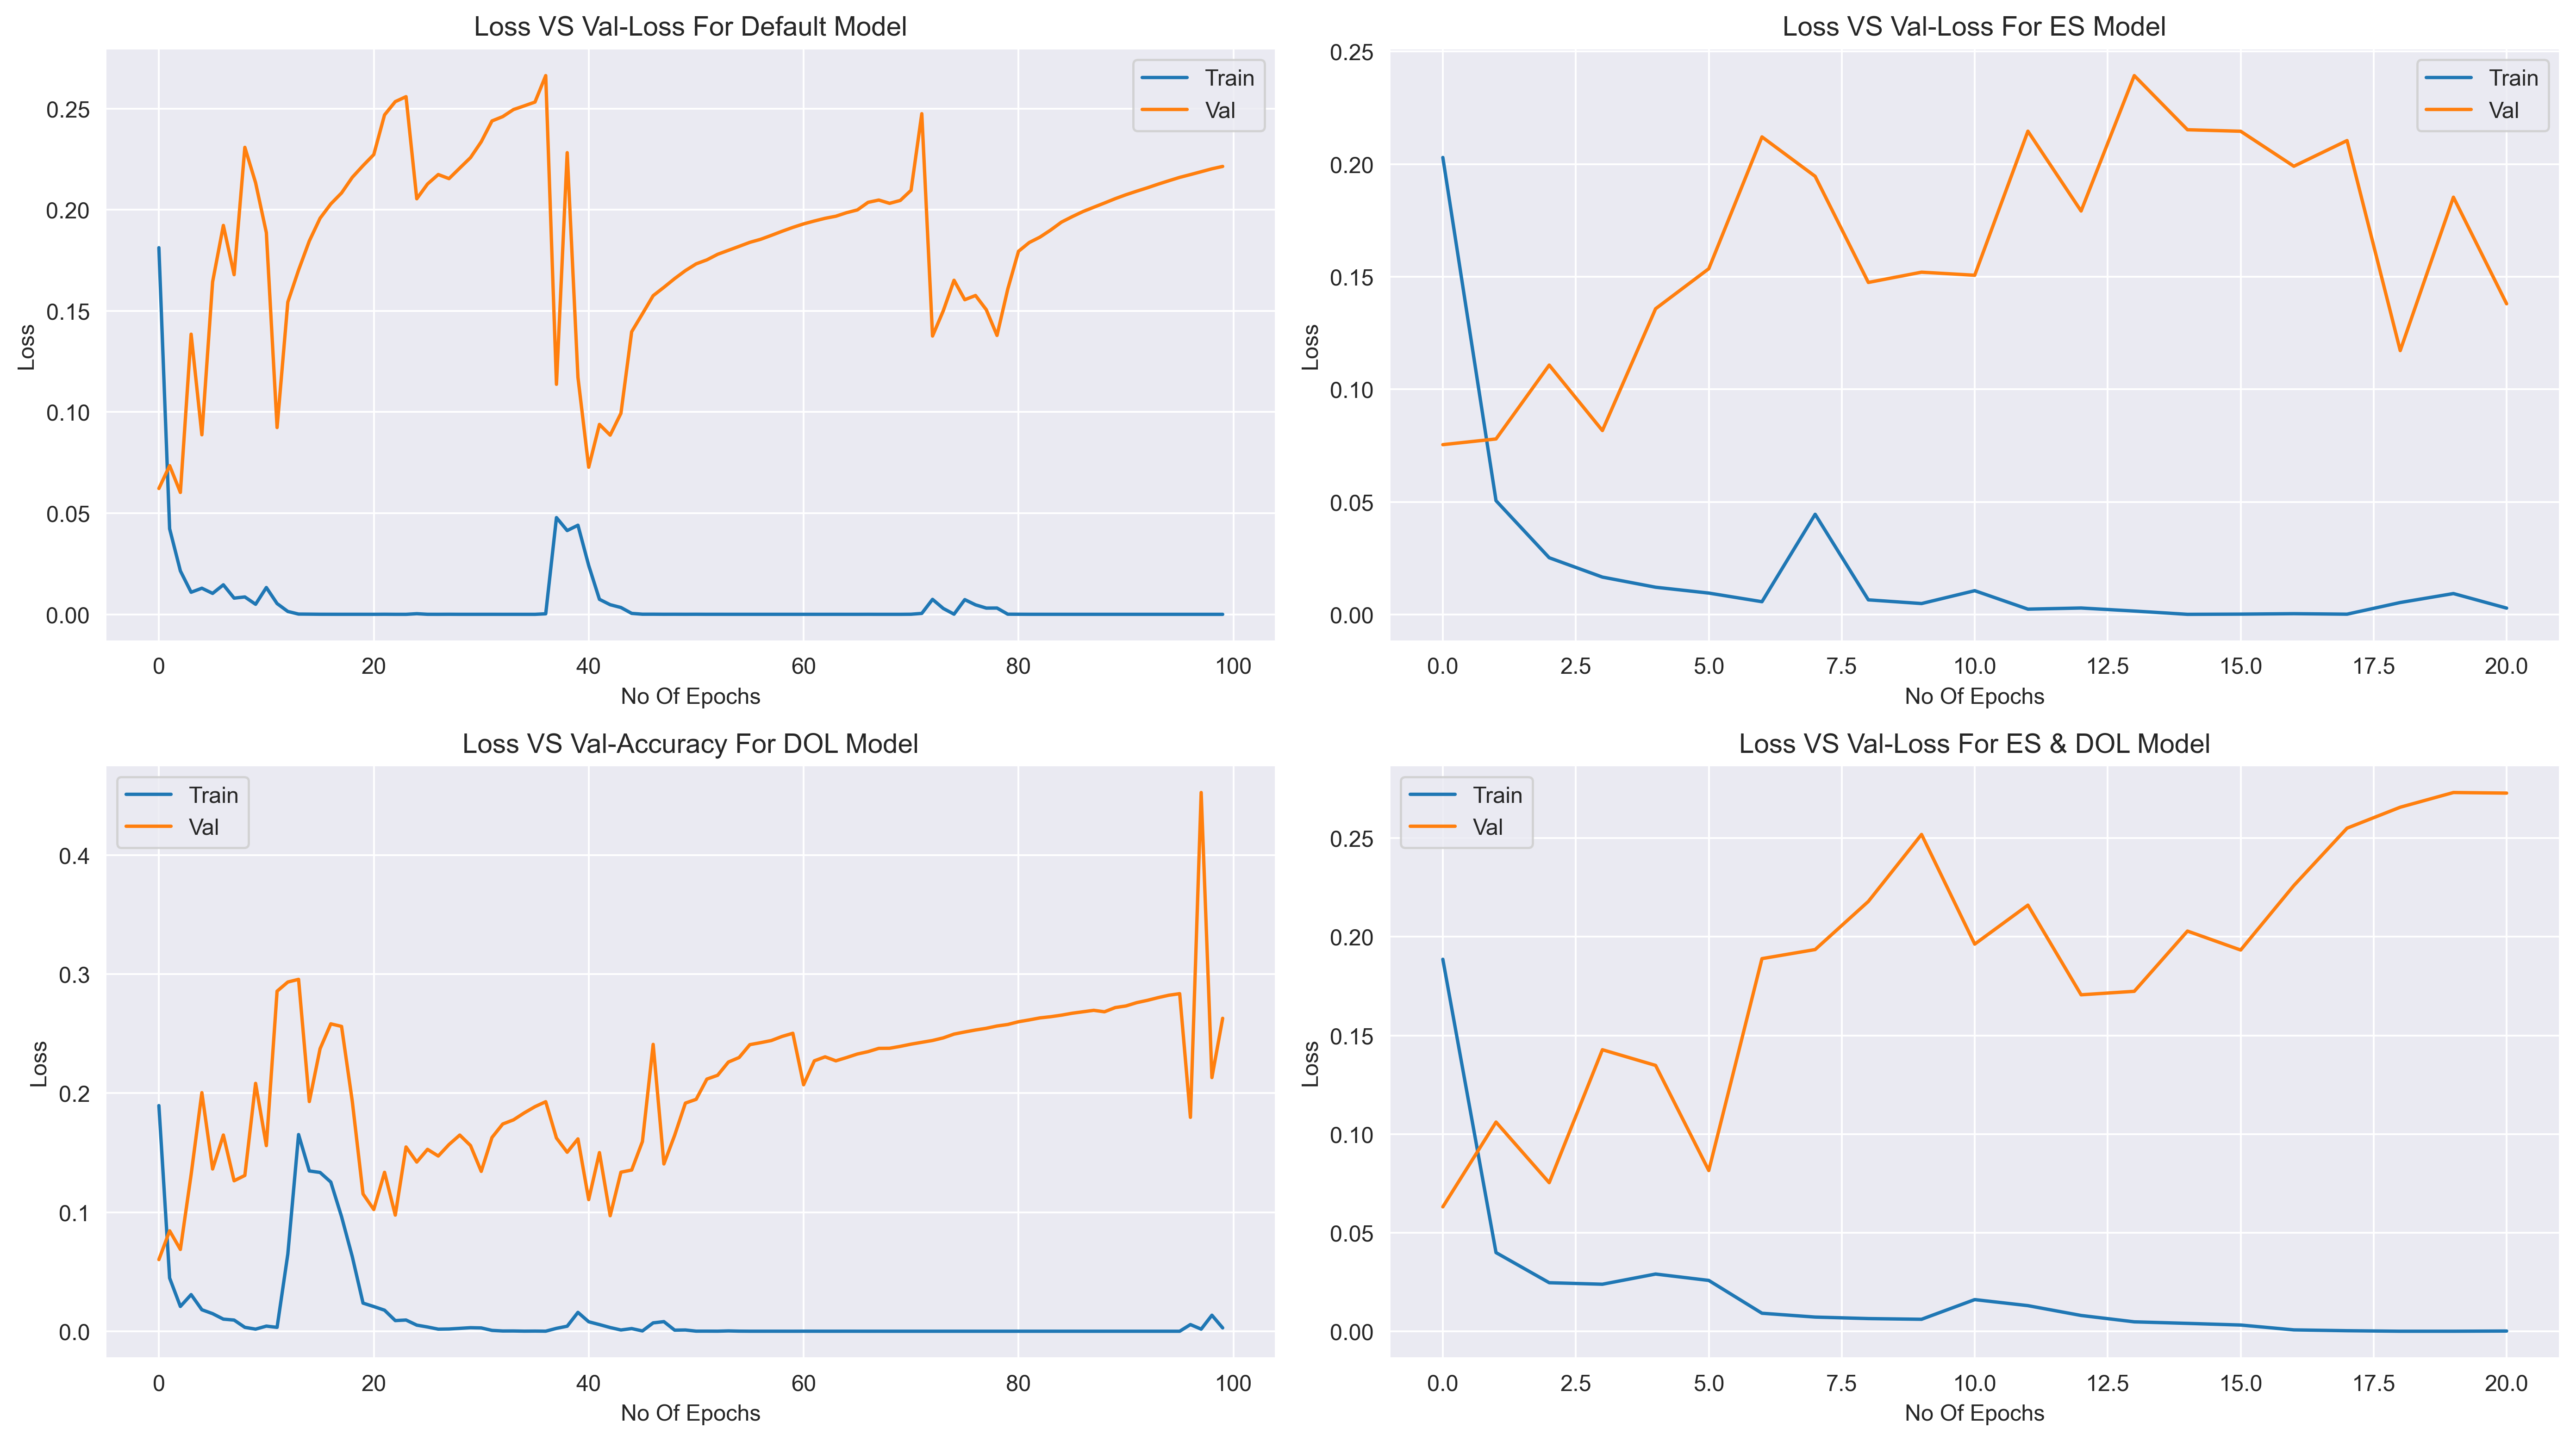

In [38]:
fig, ax = plt.subplots(2,2)

ax[0][0].set_title('Loss VS Val-Loss For Default Model')
ax[0][0].set_xlabel('No Of Epochs')
ax[0][0].set_ylabel('Loss')
sns.lineplot(def_history.history['loss'], label='Train', ax=ax[0][0])
sns.lineplot(def_history.history['val_loss'], label='Val', ax=ax[0][0])

ax[0][1].set_title('Loss VS Val-Loss For ES Model')
ax[0][1].set_xlabel('No Of Epochs')
ax[0][1].set_ylabel('Loss')
sns.lineplot(es_history.history['loss'], label='Train', ax=ax[0][1])
sns.lineplot(es_history.history['val_loss'], label='Val', ax=ax[0][1])

ax[1][0].set_title('Loss VS Val-Accuracy For DOL Model')
ax[1][0].set_xlabel('No Of Epochs')
ax[1][0].set_ylabel('Loss')
sns.lineplot(dol_history.history['loss'], label='Train', ax=ax[1][0])
sns.lineplot(dol_history.history['val_loss'], label='Val', ax=ax[1][0])

ax[1][1].set_title('Loss VS Val-Loss For ES & DOL Model')
ax[1][1].set_xlabel('No Of Epochs')
ax[1][1].set_ylabel('Loss')
sns.lineplot(es_dol_history.history['loss'], label='Train', ax=ax[1][1])
sns.lineplot(es_dol_history.history['val_loss'], label='Val', ax=ax[1][1])


plt.tight_layout()
plt.show()